___

## Bankruptcy Prediction - Classification Using Random Forest and XGBoost Models
#### DJ Dawkins, Nathan Deinlein, Joseph Lazarus, and Puri Rudick​

DS7333 QTW: Case Study 4
___

This Notebook will cover the following topics in order: 
1) Business Overview and Objectives
2) Data Evaluation and Engineering
3) Modeling Preparations and Model Building
4) Model Evaluation
5) Model Interpretability and Explainability
6) Conclusions and Discussions

In [2]:
# Imports necessary python packages
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

---
<a id="obj"></a>
### Business Overview and Objectives
Bankruptcy prediction is an important problem in finance, since successful predictions would allow stakeholders to take early actions to limit their economic losses. In recent years many studies have explored the application of machine learning models to bankruptcy prediction with financial ratios as predictors.

The goal of this case study is to build a Random Forest Model and a XGBoost Model using historical financial data to predict which companies are likely to be bankrupted and evaluate which variables are most important to determine the bankruptcy. These predictions will be used by the finance division of investment firms to divest of companies in advance that would cause significant losses in the future.

---
<a id="data"></a>
### Data Evaluation and Engineering

**Raw dataset:**
- The raw dataset is collected over five years in the format of .arff files. The team started the process by combining those 5 files together into a dataframe.  We then wrote the data to a simple csv file for a more convinience way to use it in the future.

**Data Description:**
- There is a total of 43,405 observation in the dataset.
- The dataset contains 64 features (Attr1 to Attr 64).  All features are continuous variables.
- The target variable is called 'class' with 2 values: b'0' for Non-bankrupt and b'1' for Bankrupt.  We then mapped the target variable b'0' to 0 and b'1' to 1 to make it simple to be used in our models.
    - *41,314* observations for b'0' or 0 or Non-bankrupt class
    - *2,091* observations for b'1' or 1 or Bankrupt class


In [18]:
# Read in all 5 years record then combine to one dataset
# df = pd.DataFrame()

# for i in range(1,6):
#     path = 'Data/' + str(i) + 'year.arff'
#     data = arff.loadarff(path)
#     data = pd.DataFrame(data[0])
#     df = pd.concat([df, data], ignore_index=True, sort=False)

# df.to_csv(r'./Data/all_5years.csv', index = False)    #Write the combine dataset for (easier-read) future uses
# df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [76]:
with open('./Data/CS4Metadata_2.txt') as f:
    contents = f.readlines()

In [91]:
named_cols = contents[2:]
named_cols = [x[:-1] for x in named_cols]
named_cols.append("class")


In [92]:
named_cols

['X1 net profit / total assets',
 'X2 total liabilities / total assets',
 'X3 working capital / total assets',
 'X4 current assets / short-term liabilities',
 'X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
 'X6 retained earnings / total assets',
 'X7 EBIT / total assets',
 'X8 book value of equity / total liabilities',
 'X9 sales / total assets',
 'X10 equity / total assets',
 'X11 (gross profit + extraordinary items + financial expenses) / total assets',
 'X12 gross profit / short-term liabilities',
 'X13 (gross profit + depreciation) / sales',
 'X14 (gross profit + interest) / total assets',
 'X15 (total liabilities * 365) / (gross profit + depreciation)',
 'X16 (gross profit + depreciation) / total liabilities',
 'X17 total assets / total liabilities',
 'X18 gross profit / total assets',
 'X19 gross profit / sales',
 'X20 (inventory * 365) / sales',
 'X21 sales (n) / sales (n-1)',
 'X22 profit on operating ac

In [19]:
# Read in dataset (directly from the file that we wrote to Github)
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%204/Data/all_5years.csv")
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [93]:
df.columns = named_cols
df.head()

,X1 net profit / total assets,X2 total liabilities / total assets,X3 working capital / total assets,X4 current assets / short-term liabilities,X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6 retained earnings / total assets,X7 EBIT / total assets,X8 book value of equity / total liabilities,X9 sales / total assets,X10 equity / total assets,...,X56 (sales - cost of products sold) / sales,X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58 total costs /total sales,X59 long-term liabilities / equity,X60 sales / inventory,X61 sales / receivables,X62 (short-term liabilities *365) / sales,X63 sales / short-term liabilities,X64 sales / fixed asset,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [94]:
# There are 2 classes: 0 and 1 - dtype is int!
print(df.groupby(['class'])['class'].count())
df['class'] = df['class'].astype(str)

class
0    41314
1     2091
Name: class, dtype: int64


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   X1 net profit / total assets                                                                                            43397 non-null  float64
 1   X2 total liabilities / total assets                                                                                     43397 non-null  float64
 2   X3 working capital / total assets                                                                                       43397 non-null  float64
 3   X4 current assets / short-term liabilities                                                                              43271 non-null  float

In [96]:
# There are 2 classes: 0 and 1 - dtype is int!
print(df.groupby(['class'])['class'].count())

class
0    41314
1     2091
Name: class, dtype: int64


In [6]:
# # Mapped the target variable b'0' to 0 and b'1' to 1
# class_dict = {b'0': '0', b'1': '1'}

# df['class'] = df['class'].map(class_dict)
# print(df.groupby(['class'])['class'].count())

Series([], Name: class, dtype: int64)


**Missing Values:**
- There is no missing value in the target variable -- Yeah!
- All features have at least one missing value. (As shown in the shape of df_na in the code below with 64 rows.)
- Top 5 missing values features are:
    - Attr37 has 18,984 missing values or 43.7% missing
    - Attr21 has 5,854 missing values or 13.5% missing
    - Attr27 has 2,764 missing values or 6.4% missing
    - Attr60 has 2,152 missing values or 5.0% missing
    - Attr45 has 2,147 missing values or 4.9% missing
- To drop all missing values from the dataset, we will lost more than half of the observations.  We decided to keep all observations by looking at the compromise way to manipulate all missing values.

In [98]:
# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na

,count,percent_missing
X37 (current assets - inventories) / long-term liabilities,18984,0.437369
X21 sales (n) / sales (n-1),5854,0.134869
X27 profit on operating activities / financial expenses,2764,0.063679
X60 sales / inventory,2152,0.049580
X45 net profit / inventory,2147,0.049464
...,...,...
X35 profit on sales / total assets,8,0.000184
X1 net profit / total assets,8,0.000184
X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),7,0.000161
X59 long-term liabilities / equity,7,0.000161


<AxesSubplot:xlabel='index', ylabel='percent_missing'>

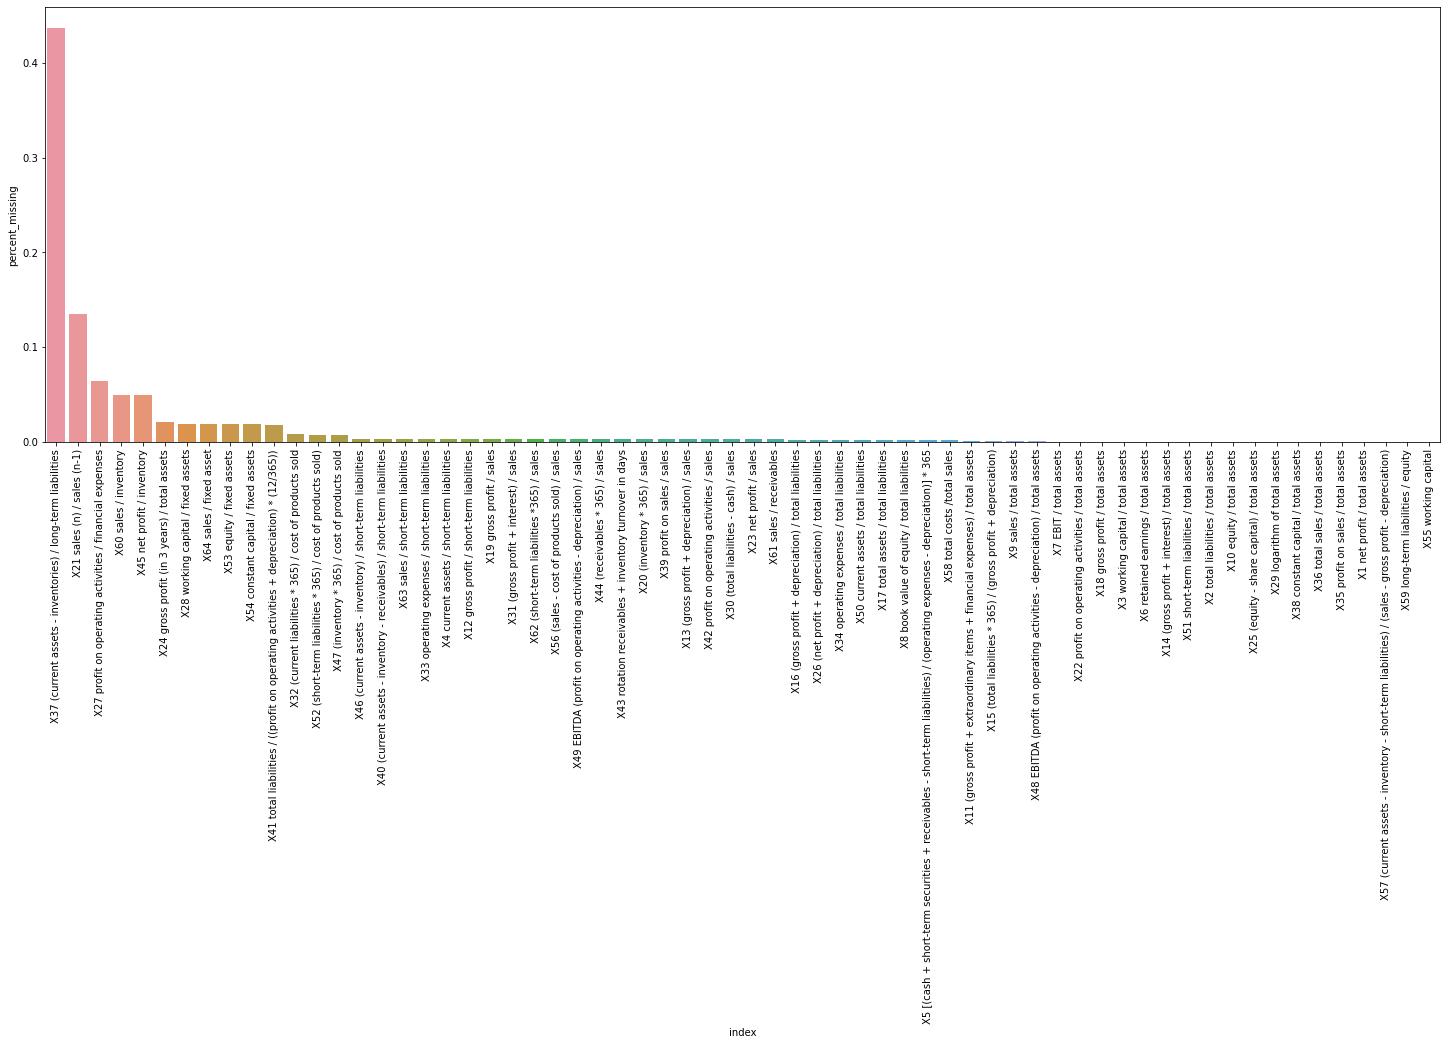

In [99]:
a4_dims = (25, 8)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)

sns.barplot(x="index", y="percent_missing", data=df_na.reset_index())

Top 5 features with the largets percent missing values are 2,000 or greater <br>
Last 20 features with the smallest percent missing values are less than 10 percent

#### Exploratory Data Analysis (EDA)

- As mentioned above, all 64 feature are continunous variable.  Below is statistical seummary table for all features using df.describe().

- Looking at the *standard diviation (std)* of each feature, especially on the plot of features std plot, there are 10 features that have extremely high std compare to other features.
    - Those high std values features (higher than 20,000) are: *Attr5, Attr15, Attr20, Attr27, Attr32, Attr43, Attr44, Attr47, Attr55, Attr60, and Attr62*
    - The box plot of those features mentioned above clearly demonstrate some outliers in each feature.

In [100]:
df.describe()

,X1 net profit / total assets,X2 total liabilities / total assets,X3 working capital / total assets,X4 current assets / short-term liabilities,X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6 retained earnings / total assets,X7 EBIT / total assets,X8 book value of equity / total liabilities,X9 sales / total assets,X10 equity / total assets,...,X55 working capital,X56 (sales - cost of products sold) / sales,X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58 total costs /total sales,X59 long-term liabilities / equity,X60 sales / inventory,X61 sales / receivables,X62 (short-term liabilities *365) / sales,X63 sales / short-term liabilities,X64 sales / fixed asset
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [101]:
df_std = df.describe().iloc[[2]]
df_std = df_std.T
df_std.reset_index(inplace=True)

##### Line plot of the standard deviations for all features in the dataset

<AxesSubplot:xlabel='index', ylabel='std'>

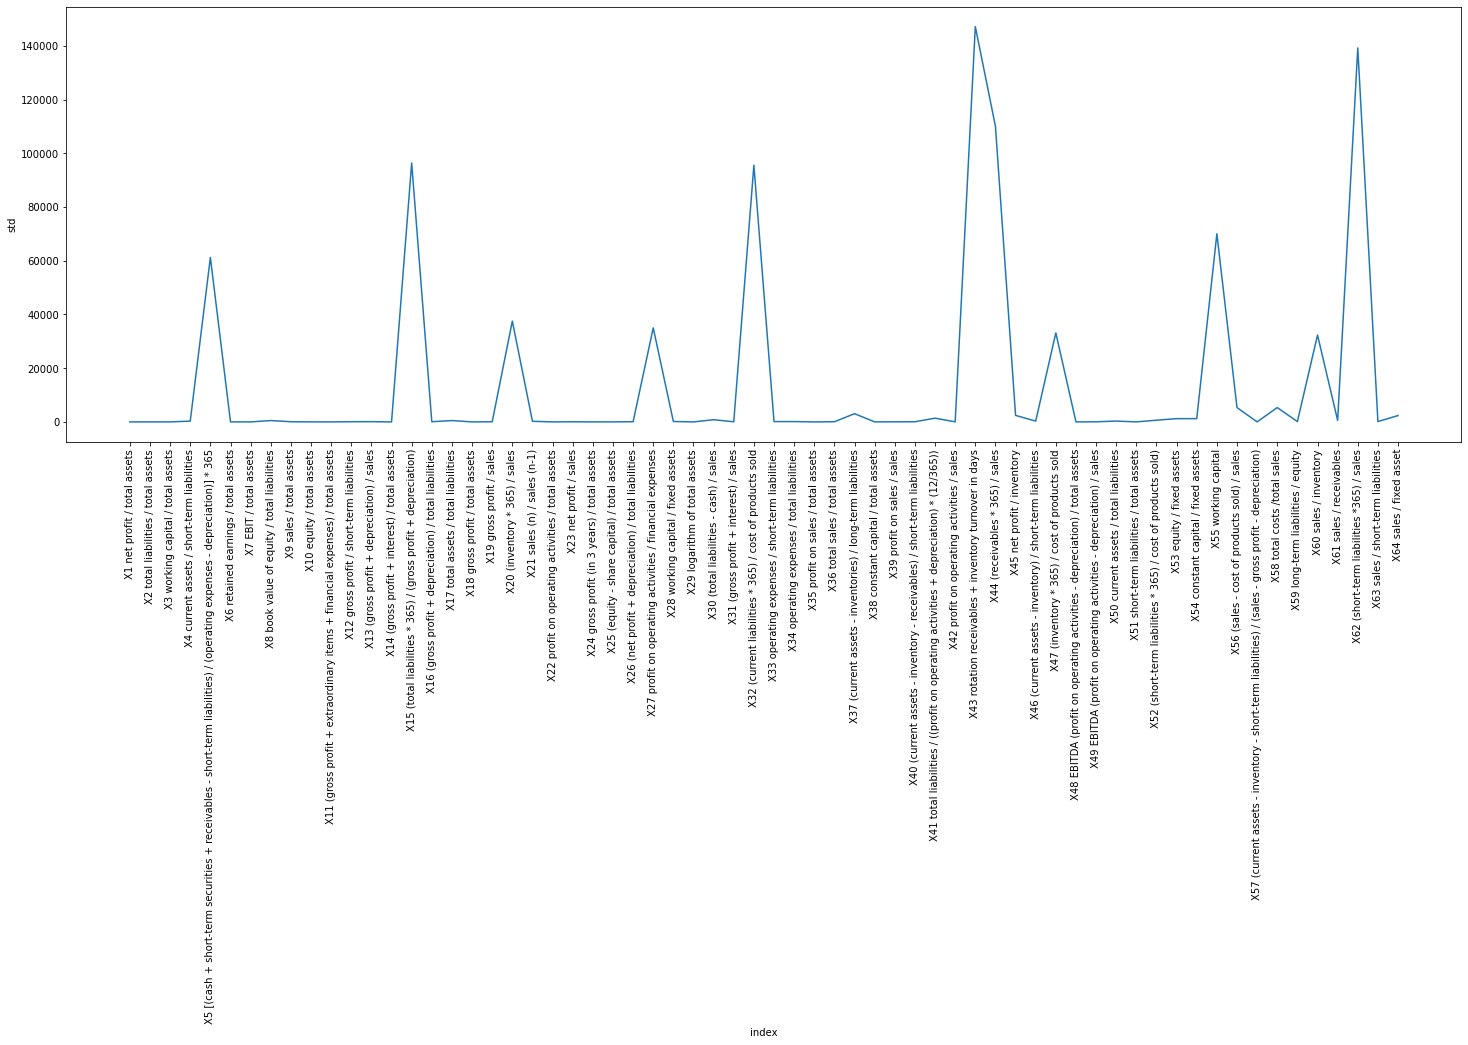

In [102]:
a4_dims = (25, 8)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)

sns.lineplot(x="index", y="std", data=df_std)

In [103]:
# Collecting list of features with values greater than 2000
outlier_stats = df_std[ df_std["std"]> 20000].reset_index(drop=True)
outlier_ft_list = list(outlier_stats["index"])

In [104]:
# Create outlier_df by filtering out non-outlier features
outlier_df = df[outlier_ft_list]
outlier_df.describe()

,X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X15 (total liabilities * 365) / (gross profit + depreciation),X20 (inventory * 365) / sales,X27 profit on operating activities / financial expenses,X32 (current liabilities * 365) / cost of products sold,X43 rotation receivables + inventory turnover in days,X44 (receivables * 365) / sales,X47 (inventory * 365) / cost of products sold,X55 working capital,X60 sales / inventory,X62 (short-term liabilities *365) / sales
count,4.331600e+04,4.336900e+04,4.327800e+04,4.064100e+04,4.303700e+04,4.327800e+04,4.327800e+04,4.310800e+04,4.340400e+04,4.125300e+04,4.327800e+04
mean,-3.853466e+02,1.991890e+03,2.430209e+02,1.107896e+03,1.162621e+03,1.074125e+03,8.311085e+02,3.578418e+02,7.672188e+03,4.480858e+02,1.502328e+03
std,6.124303e+04,9.643193e+04,3.754517e+04,3.501237e+04,9.559356e+04,1.472188e+05,1.100510e+05,3.314634e+04,7.005310e+04,3.234560e+04,1.392667e+05
min,-1.190300e+07,-9.632400e+06,-2.934000e+01,-2.590100e+05,-9.295600e+03,-1.158700e+05,-1.158700e+05,-9.611000e+01,-1.805200e+06,-1.244000e+01,-2.336500e+06
25%,-4.908000e+01,2.225800e+02,1.541325e+01,4.504800e-02,4.639500e+01,6.660850e+01,3.487775e+01,1.622575e+01,2.755425e+01,5.545500e+00,4.214400e+01
50%,-1.034500e+00,8.462600e+02,3.514950e+01,1.084100e+00,7.832500e+01,9.940150e+01,5.476750e+01,3.812950e+01,1.088350e+03,9.791700e+00,7.132600e+01
75%,5.063425e+01,2.226900e+03,6.372275e+01,5.139300e+00,1.280800e+02,1.406975e+02,8.052250e+01,7.033950e+01,4.993325e+03,2.018100e+01,1.172200e+02
max,1.250100e+06,1.023600e+07,7.809200e+06,4.208800e+06,1.736400e+07,3.039300e+07,2.258400e+07,6.084200e+06,6.123700e+06,4.818700e+06,2.501600e+07


<AxesSubplot:>

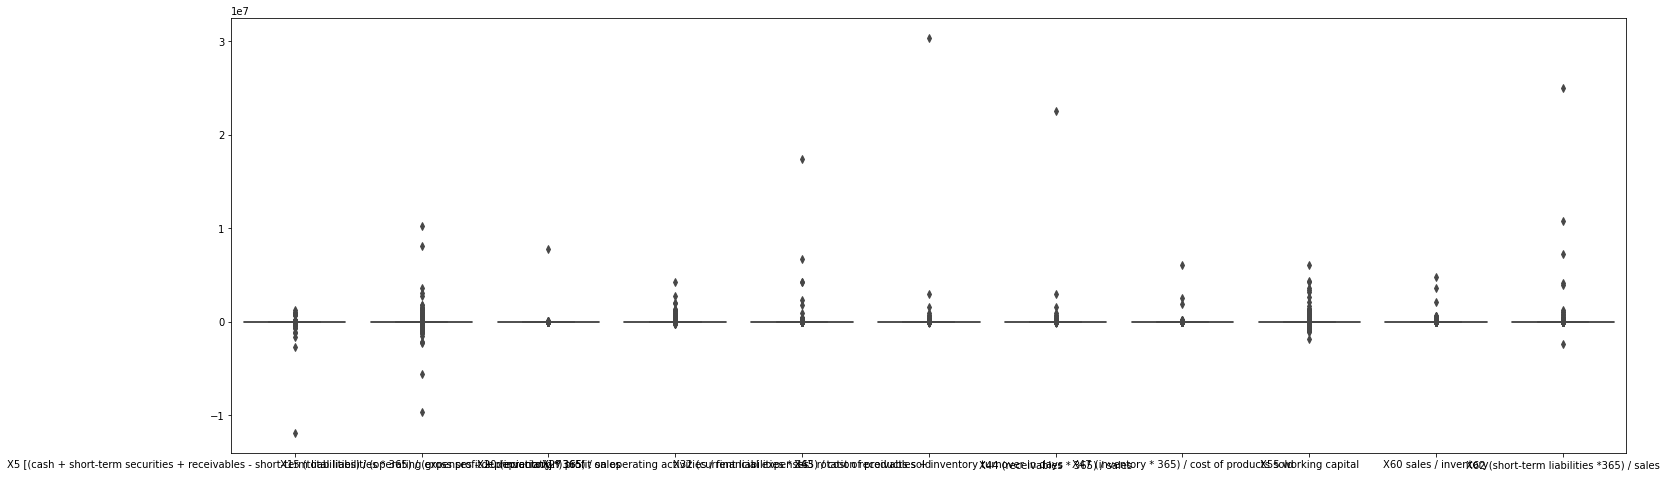

In [105]:
# The box plot of those features mentioned above clearly demonstrate some outliers in each feature.

a4_dims = (25, 8)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)

sns.boxplot(data=outlier_df)

#### Data Manipulation

Random Forest model requires a completed dataset, which mean that we cannot have any missing values in the dataset.  In this case, we need to replace all the missing values with:

- Since all features are continuous, we decided to fill in the missing value for each feature with its mean. 
- However, With extreme outlier in the 10 high std feature mention above, we decided to fill the missing values in those feature with their median value instead. This is to make sure that the eactreme outliers will not affect the fill-in values.

In [106]:
feature_data = df.copy()
feature_data.drop(["class"], axis=1, inplace=True)

mean_replace_cols = list(feature_data.columns.difference(outlier_df.columns))
median_replace_cols = list(outlier_df.columns)

In [107]:
full_df = df.copy()

# Replace missing values in numerical variables with its mean.
for col in mean_replace_cols:
    full_df[col].fillna(full_df[col].mean(), inplace=True)

# Count missing values
df_na = pd.DataFrame(df.isna().sum())

In [108]:
# Replace missing values in numerical variables with its median.
for col in median_replace_cols:
    full_df[col].fillna(full_df[col].median(), inplace=True)

In [109]:
full_df.describe()

,X1 net profit / total assets,X2 total liabilities / total assets,X3 working capital / total assets,X4 current assets / short-term liabilities,X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6 retained earnings / total assets,X7 EBIT / total assets,X8 book value of equity / total liabilities,X9 sales / total assets,X10 equity / total assets,...,X55 working capital,X56 (sales - cost of products sold) / sales,X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58 total costs /total sales,X59 long-term liabilities / equity,X60 sales / inventory,X61 sales / receivables,X62 (short-term liabilities *365) / sales,X63 sales / short-term liabilities,X64 sales / fixed asset
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.845586e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672036e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.263554e+02,17.033202,1.498141e+03,9.343074,72.788592
std,2.993833,5.842209,5.438928,294.978029,6.118021e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,7.005230e+04,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153369e+04,552.399187,1.390628e+05,123.985521,2347.072100
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.896200e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,2.757300e+01,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800
50%,0.049636,0.471940,0.196580,1.574000,-1.034500e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,1.088350e+03,5.270100e-02,0.119650,9.511200e-01,0.006389,9.791700e+00,6.649500,7.132600e+01,5.102900,4.389200
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,4.993200e+03,1.287800e-01,0.284570,9.928000e-01,0.236280,1.921900e+01,10.443000,1.169800e+02,8.650900,10.461000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


---
<a id="modelp"></a>
### Classification Models

To approach the objectives of this case study, we decided to use **Decision Tree Algorithm**. There are multiple advantages of the algorithm that we aould like to mention here:
- It can be used to solve both regression and classification problems.
- It requires less effort for data preparation during pre-processing. It does not require normalization of data as well.
- It is very intuitive and easy to explain to technical teams as well as stakeholders.
- Missing values in the data also do NOT affect the process of building a decision tree in some types of models.

There are 2 decision tree models that we are proposing for this classifiction: **Random Forest ane XGBoost Model**

<img src="https://miro.medium.com/max/1400/1*6n0rqLRc8ljOsNlQ2Z5xug.png" style="float: right" width="700"/>

#### **Random Forest**
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each *individual tree* to try to create an *uncorrelated forest* of trees whose prediction by committee is more accurate than that of any individual tree.

In conclusion, Random forest is a collection of trees in which each of them gives a prediction and finally, we collect the outputs from all the trees and considers the mean, median, or mode of this collection as the prediction of this forest depending upon the nature of data (either continues or categorical).

#### **XGBoost** (eXtreme Gradient Boosting)
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost was developed to increase speed and performance, while introducing regularization parameters to reduce overfitting. Gradient boosted trees use regression trees (or CART) in a sequential learning process as weak learners.


###### *<div style="text-align: right">Image Credits: https://dataaspirant.com</div>*

In [38]:
# Imports necessary python packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#### To prepare, build, evaluate and interpret these 2 models, we follow the steps below:
### Model Preparation and Model Building
1. We splitted the dataset into **90% of the dataset to the train and 10% to the validation (or test) dataset**. To make sure that we have the validate dataset that is not invaded by model building process.
    - We used train_test_split function from sklearn
    - **Random Forest** requires completed dataset without missing values. So we used the maipulated dataset, which called 'full_df' to build the Random Forest model.
    - **XGBoost model** can handle a dataset with missing velues. So we will use the original dataset with all missing values include, called 'df' to build the XGBoost model.
2. **ColumnTransformer using StandardScaler** is used to scale all features. Compiling this with **Pipeline** function from sklearn to make sure that there is no leakage between train and test dataset.
3. To find the best model parameters, we use **RandomizedSearchCV**. The RandomizedSearchCV, in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. This can help us save tremendous amount on computational cost.
### Model Evaluation
4. We then fitted the model best parameter to the train dataset using **coss_validation (cv=5)**.
5. Finally, we made prediction on the test dataset using the model. To evaluate model performance, we used the following 4 matrices: **Accuracy, Precision, Recall, and F1-score**. We will discuss about this in more detail in the next section.
**We also use these 4 matrices to determine which model performs better, between Random FOrest and XGBoost**
### Model Interpretation
6. After all, we looked at the most important features for each model to see which variables are most important to determine the bankruptcy.

---
### Random Forest Model (Step 1-6)

#### 1. Splitted the Dataset - 90% Train and 10% Test Dataset
- **Random Forest** requires completed dataset without missing values. So we used the maipulated dataset, which called 'full_df' to build the Random Forest model.

Using train_test_split function, we have got:
- Train Dataset: 39,064 obs. - 37,192 as Non-bankrupt (92.3%) and 1,872 as Bankrupt (4.8%)
- Test Dataset: 4,341 obs. - 4,122 as Non-bankrupt (95.0%) and 219 as Bankrupt (5.0%)

In [39]:
# Random Forest - Using Full_df
model_data = full_df.copy()

feature_data = model_data.copy()
feature_data.drop(["class"], axis=1, inplace=True)

target_data = model_data['class']

# Splitted train and test dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(feature_data,target_data,test_size=0.10,random_state=0)

print("Size of modeling set (to be CV split): ", X_train_full.shape)
print(y_train_full.value_counts())
print(y_train_full.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test_full.shape)
print(y_test_full.value_counts())
print(y_test_full.value_counts(normalize=True))

Size of modeling set (to be CV split):  (39064, 64)
0    37192
1     1872
Name: class, dtype: int64
0    0.952079
1    0.047921
Name: class, dtype: float64
Size of hold back validation set:  (4341, 64)
0    4122
1     219
Name: class, dtype: int64
0    0.949551
1    0.050449
Name: class, dtype: float64


#### 2. Scale All Features Using ColumnTransformer and StandardScaler. Created Pipeline for a Model.
We also setup model parameters for RandomSearchCV in this section.

In [40]:
scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), feature_data.columns)], remainder='passthrough') # Default is to drop untransformed columns

rf_ = RandomForestClassifier()

pipeline = Pipeline([
    ('scaler', scalar_obj),
    ('classifier', rf_)
])

# Setup model parameters for RandomSearchCV
param_grid = {
    "classifier__n_estimators": [50, 300],
    "classifier__max_features": ["auto"],
    "classifier__max_depth": [30],
    "classifier__criterion": ["gini"],
}
# param_grid = {
#     "classifier__n_estimators": [50, 100, 300, 500],
#     "classifier__max_features": ["auto", "sqrt", "log2"],
#     "classifier__max_depth": [10, 20, 30, 40, 50],
#     "classifier__criterion": ["gini", "entropy"],
# }

#### 3. Use RandomizedSearchCV to Find Best Model Parameters
*Here you can see that we used recall score for the RandomizedSearchCV. We will discuss about this in the next section.*

The best Random Forest model parameters based on RandomizedSearchCV above shown above. In general, all models from RandomizedSearchCV show delivered quite low recall score, about 0.11 - 0.23.

In [41]:
# Created recall_scorer to use in RandomizedSearchCV
recall_scorer = make_scorer(recall_score, pos_label='1')

clf = RandomizedSearchCV(pipeline, param_grid, scoring=recall_scorer, n_jobs=-1, random_state=42)
clf.fit(X_train_full, y_train_full)
print("Best parameters set found on development set:")
print(clf.best_params_)

print()

print("Grid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters set found on development set:
{'classifier__n_estimators': 50, 'classifier__max_features': 'auto', 'classifier__max_depth': 30, 'classifier__criterion': 'gini'}

Grid scores on development set:
0.241 (+/-0.007) for {'classifier__n_estimators': 50, 'classifier__max_features': 'auto', 'classifier__max_depth': 30, 'classifier__criterion': 'gini'}
0.229 (+/-0.017) for {'classifier__n_estimators': 300, 'classifier__max_features': 'auto', 'classifier__max_depth': 30, 'classifier__criterion': 'gini'}



---
### Model Evaluation

<img src="https://blog.paperspace.com/content/images/2020/09/Fig01.jpg" style="float: right" width="400"/>

To evaluate the models, there are 4 model matrics evaluation that we included:

1) **Accuracy**: Model accuracy is defined as the number of classifications a model correctly predicts divided by the total number of predictions made. In other words, 'what percent of our prediction is right?'|.
> $$ Accuracy = \frac{TP+TN}{ALL} $$

2) **Precision**: The precision measures the model's performance in classifying a sample as positive. In other words, 'what percent of bankruptcy prediction were corrected?'.
> $$ Precision = \frac{TP}{TP+FP} $$

3) **Recall**: The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected. In other words, 'what percent of bankruptcy did ee catch?'.
> $$ Recall = \frac{TP}{TP+FN} $$

4) **F1 Score**: The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. In other words, 'it is an average of presicion and recall'.
> $$ F1-Score = \frac{2 * Precision * Recall}{Precision + Recall} $$

###### *<div style="text-align: right">Image Credits: https://blog.paperspace.com/</div>*

#### Trade-Off
Out of all 4 matrices above, we would prefer the model that provides a **higher recall**, even if other matrices are relatively low. <br>
<br>
Understanding that the model will not be perfect in correctly identifying potetnital companies that may go bankrupt.<br> 
It was decided that recall was the metric of choice in this case because, the objective was to identify potetnital companies that may be go bankrupt.<br>
<br>
The recall metic was in the best intrest of the objective, because recall, in relation to precision, ensures more companies that ACTUALLY go bankrupt are correctly identified by the model as at risk. <br>
Accepting that selecting a model based on recall, may also incorrectly identify a company that does NOT go bankrupt as at risk. <br>

It is recommended in conjunction with the model, a buisness analayst treats the model output as preliminary list of companies that they should review prior to any action being taken. <br>
Reviewing a list of a few companies wondering which comapny is a false positive, is a smaller problem than, serching thousands of companies wondering which company is a false negative. <br>

Given that, the cost and likely hood of staying invested in a company that goes bankrupt is greater than potetnitally un-investing from a company that doesn't go bankrupt. <br>


In [44]:
# Create scorer for those 4 matrices mentioned above.
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

#### 4. Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

In [45]:
scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), X_train_full.columns)], remainder='passthrough') # Default is to drop untransformed columns

rf_model = RandomForestClassifier(
    n_estimators = 300,
    max_features = 'auto',
    max_depth = 30,
    criterion = 'gini',
)

pipeline = Pipeline([
    ('standard_scaler', scalar_obj),
    ('model', rf_model)
])

model_res = cross_validate(pipeline, X_train_full, y_train_full, cv=5, scoring=scorer, error_score="raise")

print("Accuracy(all models) = ",model_res['test_accuracy'])
print("Precision(all models) = ",model_res['test_precision'])
print("Recall(all models) = ",model_res['test_recall'])
print("F1(all models) = ",model_res['test_F1'])

print("\n")

print("Mean Accuracy = ",model_res['test_accuracy'].mean())
print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())

Accuracy(all models) =  [0.96057852 0.95968258 0.96070651 0.9594266  0.96018945]
Precision(all models) =  [0.88415351 0.86896908 0.89471721 0.86531052 0.890097  ]
Recall(all models) =  [0.61489868 0.60934945 0.61345666 0.60898611 0.60707877]
F1(all models) =  [0.67032888 0.6621577  0.66940669 0.66137577 0.66098401]


Mean Accuracy =  0.9601167333790382
Mean Precision =  0.8806494650011885
Mean Recall =  0.6107539331821918
Mean F1 =  0.664850609635911


#### 5. Made Prediction on Test Dataset and Evaluated the Model Performance

In [46]:
pipeline.fit(X_train_full, y_train_full)
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test_full, pipeline.predict(X_test_full)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4122
           1       0.78      0.26      0.38       219

    accuracy                           0.96      4341
   macro avg       0.87      0.63      0.68      4341
weighted avg       0.95      0.96      0.95      4341




In [47]:
from sklearn.inspection import permutation_importance

feature_names = [f"feature {i}" for i in range(X_train_full.shape[1])]

# start_time = time.time()
result = permutation_importance(
    pipeline, X_train_full, y_train_full, n_repeats=10, random_state=42, n_jobs=2
)
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


Text(0.5, 0, '')

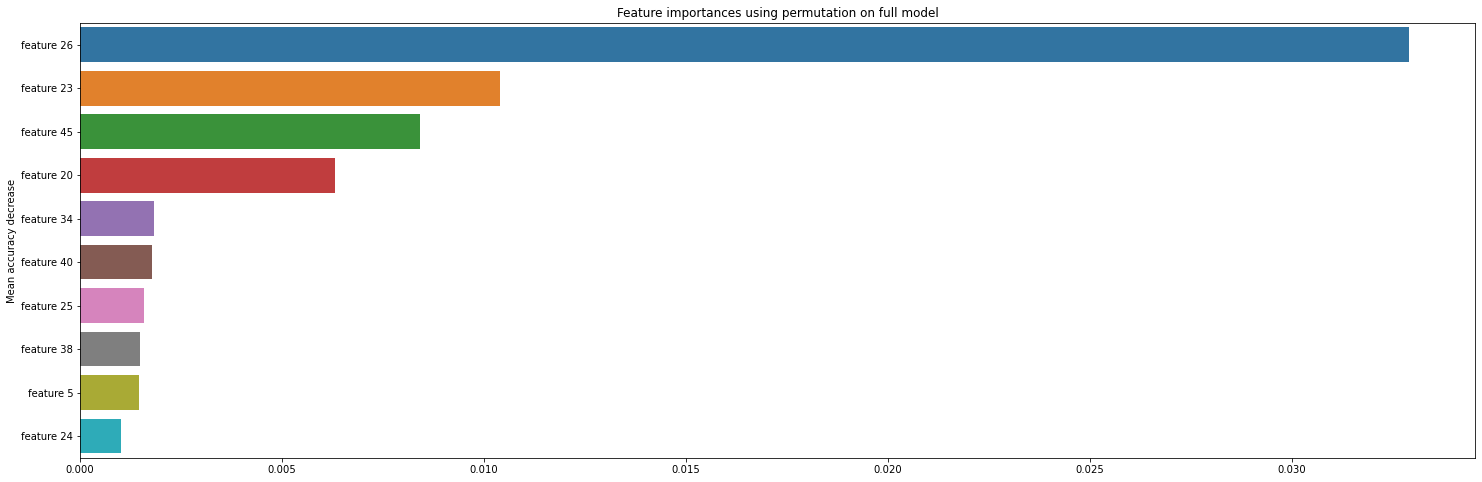

In [74]:
top_10_important_fts = forest_importances.nlargest(n=10)

a4_dims = (25, 8)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)

sns.barplot(x=0, y="index", data=top_10_important_fts.reset_index())
axes.set_title("Feature importances using permutation on full model")
axes.set_ylabel("Mean accuracy decrease")
axes.set_xlabel("")


#### 6. Most Important Features to Determine the Bankruptcy.

---
### XGBoost Model (Step 1-6)
*Below are repleted step 1-6 for XGBoost Model*

#### 1. Splitted the Dataset - 90% Train and 10% Test Dataset
- **XGBoost model** can handle a dataset with missing velues. So we will use the original dataset with all missing values include, called 'df' to build the XGBoost model.

Using train_test_split function, we have got:
- Train Dataset: 39,064 obs. - 37,192 as Non-bankrupt (92.3%) and 1,872 as Bankrupt (4.8%)
- Test Dataset: 4,341 obs. - 4,122 as Non-bankrupt (95.0%) and 219 as Bankrupt (5.0%)

In [48]:
model_data = df.copy()

feature_data = model_data.copy()
feature_data.drop(["class"], axis=1, inplace=True)

target_data = model_data['class']

# Holdout
X_train, X_test, y_train, y_test = train_test_split(feature_data,target_data,test_size=0.10,random_state=0)

print("Size of modeling set (to be CV split): ", X_train.shape)
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test.shape)
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Size of modeling set (to be CV split):  (39064, 64)
0    37192
1     1872
Name: class, dtype: int64
0    0.952079
1    0.047921
Name: class, dtype: float64
Size of hold back validation set:  (4341, 64)
0    4122
1     219
Name: class, dtype: int64
0    0.949551
1    0.050449
Name: class, dtype: float64


In [26]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#### 2. Scale All Features Using ColumnTransformer and StandardScaler. Created Pipeline for a Model.

In [27]:
from xgboost import XGBClassifier
from xgboost import plot_importance

scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), X_train.columns)], remainder='passthrough') # Default is to drop untransformed columns

model = XGBClassifier(
    nthread = 4,
    seed = 42
)

pipeline_x = Pipeline([
    ('standard_scaler', scalar_obj), 
    ('model', model)
])

param_grid = {
    'model__eta': [0.5, 0.8, 1],
    'model__gamma': [1, 1.5, 2],
    'model__max_depth': [10, 20, 30],
    'model__n_estimators': [100, 200, 500],
    'model__min_child_weight': [5, 10, 15],
    'model__max_leaves': [30,50,70],
    'model__scale_pos_weight': [20, 30]
}

#### 3. Use RamdomSearchCV to Find Best Model Parameters

In [28]:
clf = RandomizedSearchCV(pipeline_x, param_grid, n_jobs=-1, scoring='recall', random_state=42)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

In [ ]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

#### 4. Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

In [ ]:
scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), X_train.columns)], remainder='passthrough') # Default is to drop untransformed columns

xgb_model = XGBClassifier(
    nthread = 4,
    seed = 42,
    eta = .5, 
    gamma = 2,
    max_depth = 10,
    n_estimators = 100, 
    min_child_weight = 10,
    max_leaves = 30, 
    scale_pos_weight = 20
)

pipeline_x = Pipeline([
    ('standard_scaler', scalar_obj), 
    ('model', xgb_model)
])

xgb_model_scores = cross_validate(pipeline_x, X_train, y_train, cv=5, scoring=scorer, error_score="raise")

print("Accuracy(all models) = ",xgb_model_scores['test_accuracy'])
print("Precision(all models) = ",xgb_model_scores['test_precision'])
print("Recall(all models) = ",xgb_model_scores['test_recall'])
print("F1(all models) = ",xgb_model_scores['test_F1'])
print("\n")
print("Mean Accuracy = ",xgb_model_scores['test_accuracy'].mean())
print("Mean Precision = ",xgb_model_scores['test_precision'].mean())
print("Mean Recall = ",xgb_model_scores['test_recall'].mean())
print("Mean F1 = ",xgb_model_scores['test_F1'].mean())

Precision(all models) =  [0.90190136 0.87278914 0.88348914 0.86762082 0.87641349]
Recall(all models) =  [0.84636901 0.81454493 0.83656054 0.81602277 0.83312639]
F1(all models) =  [0.87182914 0.84089426 0.85830678 0.83962978 0.85328477]


Mean Precision =  0.8804427885916868
Mean Recall =  0.8293247281643235
Mean F1 =  0.8527889455454005


#### 5. Made Prediction on Test Dataset and Evaluated the Model Performance

In [ ]:
pipeline_x.fit(X_train, y_train)
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, pipeline_x.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4122
           1       0.78      0.67      0.72       219

    accuracy                           0.97      4341
   macro avg       0.88      0.83      0.85      4341
weighted avg       0.97      0.97      0.97      4341




#### 6. Most Important Features to Determine the Bankruptcy.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

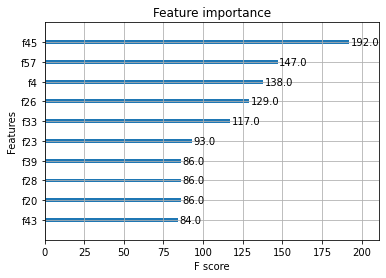

In [117]:
plot_importance(xgb_model, max_num_features=10)

---
### Conclusions and Discussions

#### Conclusions

#### Discussions

---